# ***Projet 09 - Clustering***


---
## Partie 1 - Importation - Préparation

### 1. Import des librairies (ok)
---

In [1]:
# Mes imports de lib de base
import pandas as pd # Pour travail avec les df
import numpy as np # Tout ce qui est fct math avec numpy, tjs utile

# Pour les graphiques
import matplotlib.pyplot as plt # Graphes avec matplotlib
import seaborn as sns # Graphes avec seaborn
sns.set_style('darkgrid', {'grid.color': '.5', 'grid.linestyle': ':'}) # Défini un fond de graphe que ce soit pour sns ou plt

# Pour les stats et autre
import scipy.stats as stats # Pour des stats avec scipy
import statsmodels.api as sm # Pour des régressions linéaires ou autre

# Pour le clustering et PCA
import sklearn as sk
import scipy as sp
# import pca as pca
from sklearn.cluster import KMeans # Clustering avec KMeans
from sklearn.decomposition import PCA # Pour calcul des composantes principales


### 2. Infos sur les fichiers (df) - Préparation
---

#### *2.1. Import du dataset préparé*

In [2]:
df_final = pd.read_csv('csv_clustering.csv')

In [3]:
# On part du principe que ce dataset est propre, il ne nous serviras qu'à faire les clustering
# On recale toutefois l'index sur les pays
df_final.set_index('pays', inplace = True)

In [4]:
df_final

,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken,F1,F2
pays,,,,,,,,,,,
Afghanistan,1.164779,36296.113,0.987451,1.889635e+04,0.002504,1997.0,54.09,0.491228,0.508772,-2.875917,-0.550312
Afrique du Sud,1.079063,57009.756,0.876736,3.808514e+05,0.047874,2987.0,83.36,0.787063,0.242682,0.563941,0.265681
Albanie,0.989730,2884.169,1.056815,1.301973e+04,0.025000,3400.0,119.50,0.276596,0.808511,1.767279,1.658753
Algérie,1.107140,41389.189,0.813631,1.700970e+05,0.006577,3345.0,92.85,0.992780,0.007220,0.699225,-1.110325
Allemagne,1.020819,82658.409,1.046353,3.690849e+06,0.019949,3559.0,104.07,0.870615,0.484186,3.496864,-0.568130
...,...,...,...,...,...,...,...,...,...,...,...
Égypte,1.115946,96442.591,0.705641,1.951353e+05,0.015083,3315.0,96.27,0.894400,0.088000,0.726482,-0.691240
Émirats arabes unis,1.037806,9487.203,1.029405,3.856055e+05,0.043620,3370.0,107.26,0.116505,1.050971,1.313300,2.326672
Équateur,1.084739,16785.361,1.186197,1.042959e+05,0.032108,2585.0,65.77,0.997067,0.000000,-0.557080,-0.812938


---
## Partie 2 - Clustering

### 1. Classification Ascendante Hiérarchique
---

In [5]:
# Comme vu dans le précédent notebook, nous ferons le clustering sur les composantes de l'ACP pour une meilleure précision
# Cela donne également une meilleure visualisation des clusters et des centroides si on affiche la projection dans le plan factoriel

In [6]:
# On importe les lib nécessaires
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [7]:
df_final.head()

,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken,F1,F2
pays,,,,,,,,,,,
Afghanistan,1.164779,36296.113,0.987451,1.889635e+04,0.002504,1997.0,54.09,0.491228,0.508772,-2.875917,-0.550312
Afrique du Sud,1.079063,57009.756,0.876736,3.808514e+05,0.047874,2987.0,83.36,0.787063,0.242682,0.563941,0.265681
Albanie,0.989730,2884.169,1.056815,1.301973e+04,0.025000,3400.0,119.50,0.276596,0.808511,1.767279,1.658753
Algérie,1.107140,41389.189,0.813631,1.700970e+05,0.006577,3345.0,92.85,0.992780,0.007220,0.699225,-1.110325
Allemagne,1.020819,82658.409,1.046353,3.690849e+06,0.019949,3559.0,104.07,0.870615,0.484186,3.496864,-0.568130


In [8]:
# On ne prend que les composantes de l'ACP pour faire le clustering
df_acp = df_final.drop(columns = ['evo_pop_(%)', 'pop_2017', 'evo_pib_(%)', 'pib_2017', 'ratio_chicken_kcal_(%)', 'dispo_total_(kcal)', 'dispo_total_prot_(g)', 'TAS_chicken', 'TDI_chicken'], axis = 1)
df_acp

,F1,F2
pays,,
Afghanistan,-2.875917,-0.550312
Afrique du Sud,0.563941,0.265681
Albanie,1.767279,1.658753
Algérie,0.699225,-1.110325
Allemagne,3.496864,-0.568130
...,...,...
Égypte,0.726482,-0.691240
Émirats arabes unis,1.313300,2.326672
Équateur,-0.557080,-0.812938


In [9]:
# On applique sur le df
Z = linkage(df_acp, method = "ward", optimal_ordering = True)
pd.DataFrame(Z)

,0,1,2,3
0,125.0,124.0,0.021413,2.0
1,146.0,23.0,0.021947,2.0
2,37.0,62.0,0.031187,2.0
3,70.0,115.0,0.045438,2.0
4,31.0,33.0,0.051741,2.0
...,...,...,...,...
154,300.0,309.0,6.566759,29.0
155,307.0,312.0,9.910613,66.0
156,315.0,311.0,13.433753,90.0
157,314.0,313.0,15.156412,70.0


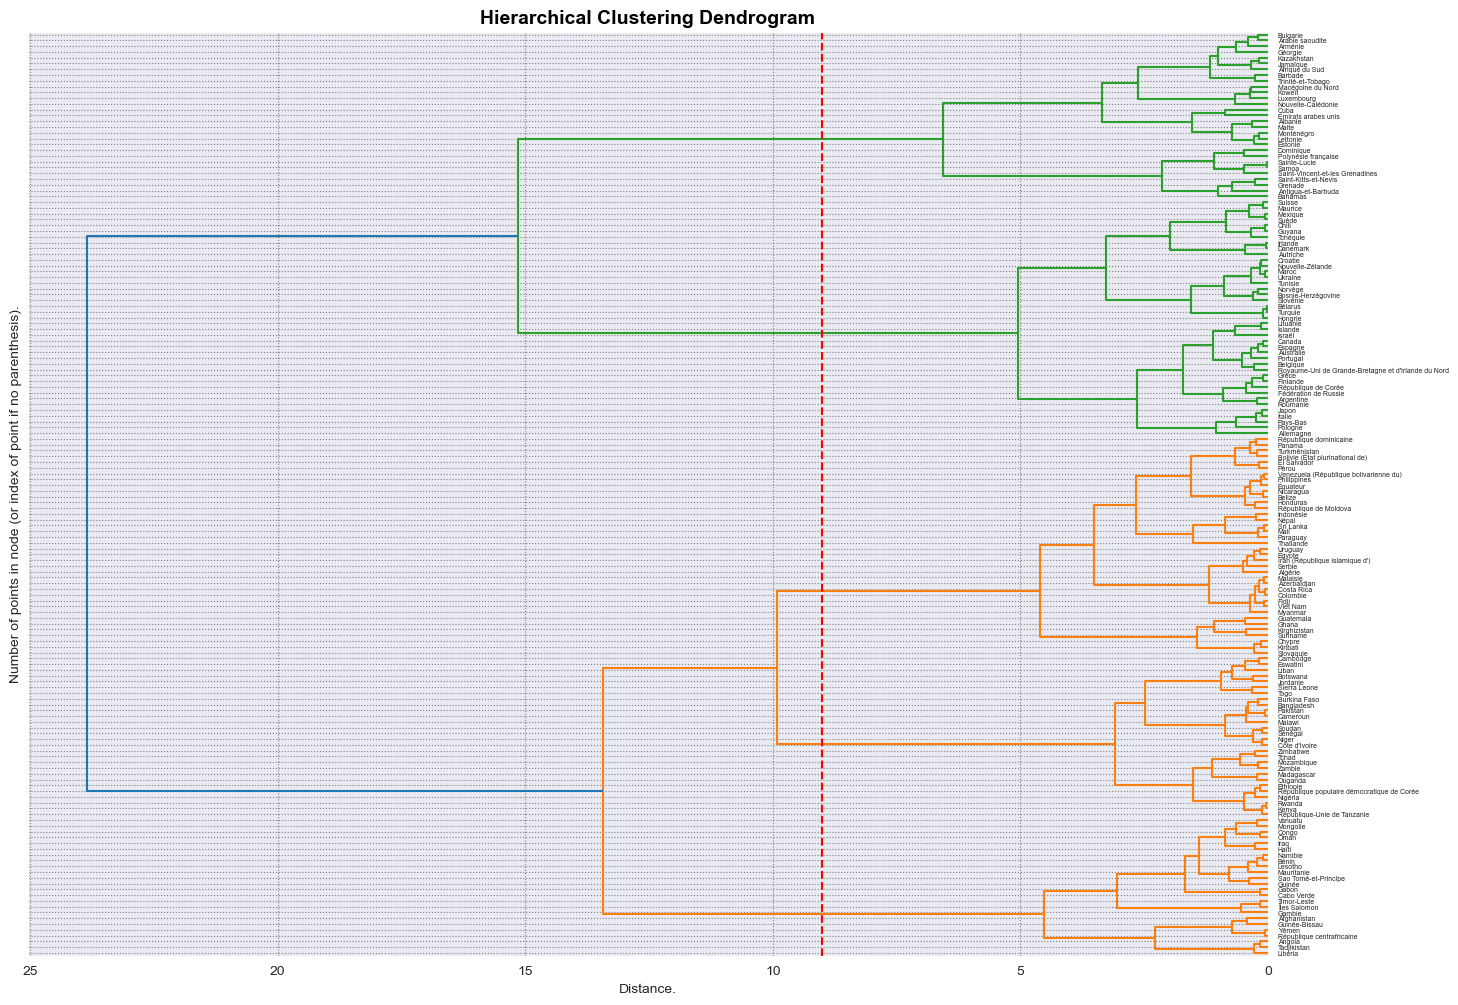

In [10]:
# On trace le dendrogramme
fig, ax = plt.subplots(1, 1, figsize = (16, 12))

dendrogram(Z, ax = ax, labels = df_acp.index, orientation = 'left', distance_sort = 'ascending')

# Tracé d'une ligne qui coupe les plus grands sauts entre clusters
plt.axvline(x = 9, color = 'red', linestyle = 'dashed')

plt.title("Hierarchical Clustering Dendrogram", fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel("Number of points in node (or index of point if no parenthesis).")
plt.xlabel("Distance.")
plt.show()

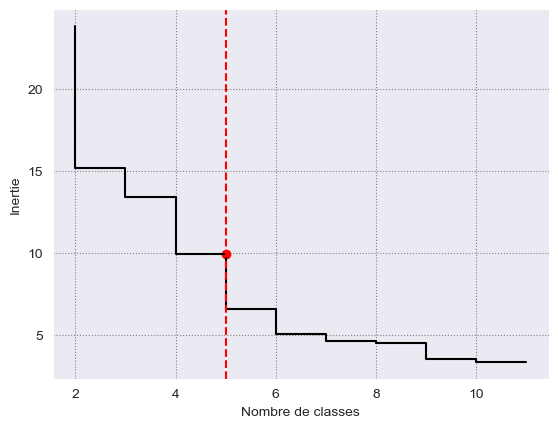

In [11]:
# Recherche du nombre optimal de clusters
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(2, len(last) + 2)

# Graphe en escalier de la chute d'inertie par nombre de cluster
plt.step(idxs, last_rev, c="black")
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")

# Ici, on teste le scénario où il y aurait x catégories
nombre = 5

# On trace la ligne correspondant au nombre de cluster
plt.scatter(idxs[np.where(idxs == nombre)], last_rev[np.where(idxs == nombre)], c = "red")
plt.axvline(idxs[np.where(idxs == nombre)], c = "red", linestyle = '--')
plt.show()

In [12]:
# Le graphe d'inertie nous montre que 5 clusters sont suffisants, on pourrait pousser à 6 si on le voulais mais pas plus

In [13]:
# On défini les paramètres du clustering après avoir regarder le dendrogramme et l'inertie par classe
cah = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')

In [14]:
# On entraine sur les données
cah.fit(df_acp)

AgglomerativeClustering(n_clusters=5)

In [15]:
# Visu des clustering effectués sur le df scaled
cah_cluster = pd.DataFrame(cah.labels_).rename(columns = {0 : 'cah_cluster'})
cah_cluster

,cah_cluster
0,3
1,0
2,0
3,1
4,2
...,...
155,1
156,0
157,1
158,4


In [16]:
# On regarde le nombre d'individus par cluster avec CAH
# Ce clustering est bien réparti
cah_cluster['cah_cluster'].value_counts()

2    41
1    38
0    29
4    28
3    24
Name: cah_cluster, dtype: int64

In [17]:
# On ajoute les cluster au df
df_acp_cah = df_acp.copy()
df_acp_cah['cah_cluster'] = cah.labels_
df_acp_cah

,F1,F2,cah_cluster
pays,,,
Afghanistan,-2.875917,-0.550312,3
Afrique du Sud,0.563941,0.265681,0
Albanie,1.767279,1.658753,0
Algérie,0.699225,-1.110325,1
Allemagne,3.496864,-0.568130,2
...,...,...,...
Égypte,0.726482,-0.691240,1
Émirats arabes unis,1.313300,2.326672,0
Équateur,-0.557080,-0.812938,1


In [18]:
# Calcul des centroides
centroide_cah = df_acp_cah.groupby('cah_cluster').mean()
# On reset l'index et on les renomme en centroide
centroide_cah = centroide_cah.reset_index()
centroide_cah['cah_cluster'] = 'centroide'
centroide_cah


,cah_cluster,F1,F2
0,centroide,0.486132,1.724420
1,centroide,-0.052455,-0.518700
2,centroide,2.079527,-0.330611
3,centroide,-2.190816,0.850317
4,centroide,-1.599484,-1.326789


In [19]:
# Ajout des centroides à l'ACP pour visualisation
# On les ajoutes à la suite de notre df
df_acp_cah_centroide = pd.concat([df_acp_cah, centroide_cah])
df_acp_cah_centroide

,F1,F2,cah_cluster
Afghanistan,-2.875917,-0.550312,3
Afrique du Sud,0.563941,0.265681,0
Albanie,1.767279,1.658753,0
Algérie,0.699225,-1.110325,1
Allemagne,3.496864,-0.568130,2
...,...,...,...
0,0.486132,1.724420,centroide
1,-0.052455,-0.518700,centroide
2,2.079527,-0.330611,centroide
3,-2.190816,0.850317,centroide


In [20]:
# Fonction pour projection des individus sur les axes (attention, option PCA non disponible ici)

In [21]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'Accent')

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire... Hahaha, oui, c'est tout a fait mon genre mdr
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='10', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})", fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
    
    plt.show()

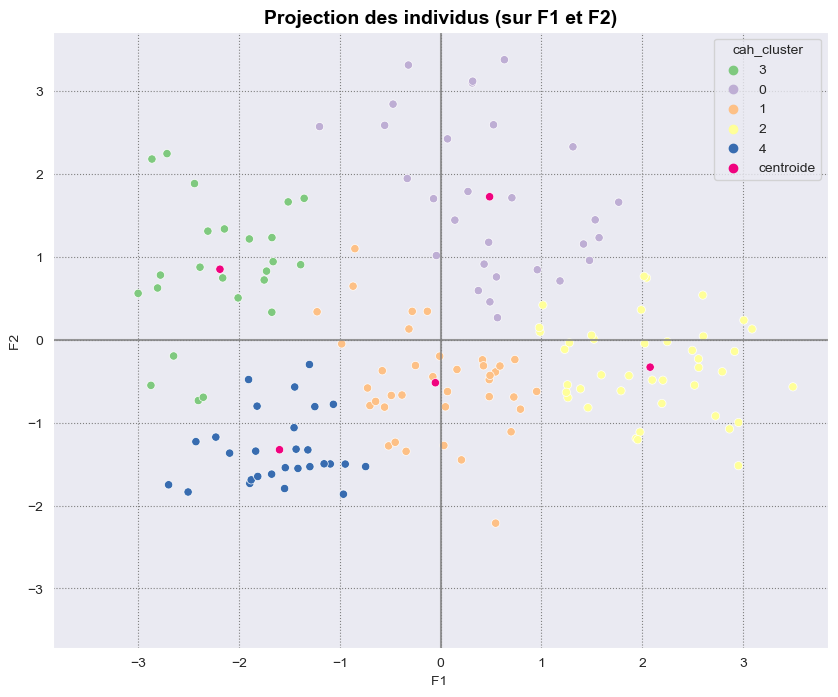

In [22]:
# Visualisation des individus avec clusters et centroides
x_y = [0,1] # Choix des composantes de l'ACP à représenter dans le plan
display_factorial_planes(df_acp_cah_centroide,
                         x_y,
                         # labels = df_acp_cah_centroide.index,
                         clusters = df_acp_cah_centroide['cah_cluster'])

In [23]:
# On vois que les centroides de nos clusters sont asser éloignés, ce qui signifie que nos clusters sont bien différents

In [24]:
# On sort un df avec les clusters pour les analyser
# On enlève également les composantes de l'ACP
df_final_cluster = df_final.copy()
# AJout des clusters CAH
df_final_cluster['cluster'] = cah.labels_
# Suppression descomposantes de l'ACP
# df_final_cluster = df_final_cluster.drop(columns = ['F1', 'F2'], axis = 1)
df_final_cluster.sample(5)


,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken,F1,F2,cluster
pays,,,,,,,,,,,,
Cambodge,1.083147,16009.409,1.579755,2.217720e+04,0.004457,2468.0,65.38,0.736842,0.263158,-1.249025,-0.806871,4
Allemagne,1.020819,82658.409,1.046353,3.690849e+06,0.019949,3559.0,104.07,0.870615,0.484186,3.496864,-0.568130,2
Arménie,1.020996,2944.791,1.085518,1.152746e+04,0.017578,3072.0,97.33,0.234043,0.744681,0.476667,1.175295,0
Zimbabwe,1.085508,14236.595,1.287809,2.204065e+04,0.007383,2167.0,51.20,0.907895,0.078947,-1.836058,-1.343627,4
Timor-Leste,1.097321,1243.258,1.392299,1.615610e+03,0.006536,2142.0,57.69,0.200000,2.200000,-2.716422,2.244509,3


### 2. KMEAN (pour comparaison)
---

In [25]:
# Recherche pour trouver le nombre de cluster opti
# On part sur x cluster à tester
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [74]:
# On défini une liste vide poury stocker l'inertie des clusters
intertia = []
# On entraine kmeans en boucle pour faire des cluster de 1 à x comme défini plus haut et récupérer l'inertie de chaque cluster
for i in k_list :
  kmeans = KMeans(n_clusters=i) # On entraine kmeans sur un nombre de cluster test
  kmeans.fit(df_acp) 
  intertia.append(kmeans.inertia_) # On ajoute l'inertie de chaque cluster dans une liste

C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
df_acp

,F1,F2
pays,,
Afghanistan,-2.875917,-0.550312
Afrique du Sud,0.563941,0.265681
Albanie,1.767279,1.658753
Algérie,0.699225,-1.110325
Allemagne,3.496864,-0.568130
...,...,...
Égypte,0.726482,-0.691240
Émirats arabes unis,1.313300,2.326672
Équateur,-0.557080,-0.812938


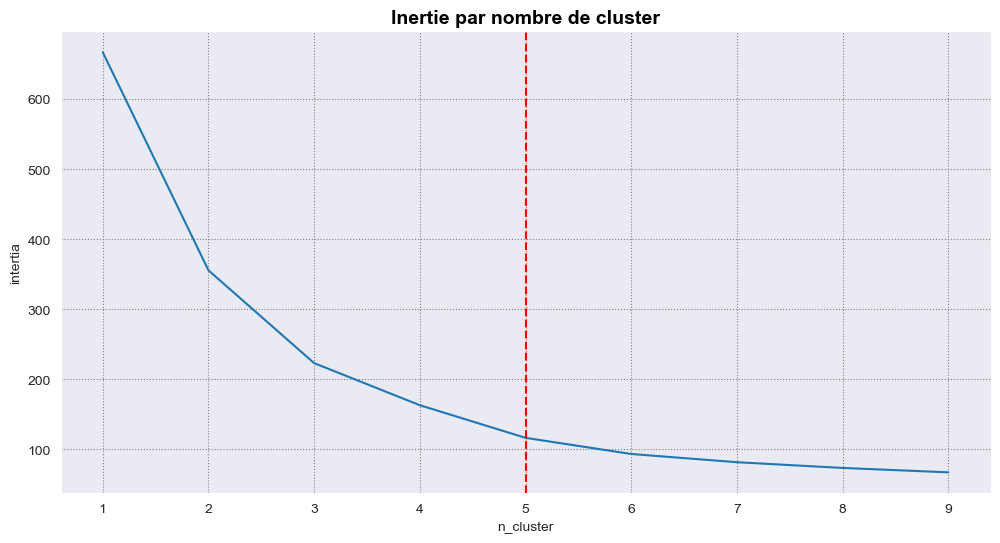

In [28]:
# On trace l'inertie par cluster (méthode du coude)
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

# Ici, on teste le scénario où il y aurait x catégories
nombre = 5
plt.axvline(nombre, c = "red", linestyle = '--')

plt.title('Inertie par nombre de cluster', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.show()

In [76]:
# Calcul du score de silhouette
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

for i in k_list :
    # Instanciation de kmeans
    km = KMeans(n_clusters=i+1)

    # Entrainement sur le model
    km.fit_predict(df_acp)

    # Calcul du score de silhouette
    score = silhouette_score(df_acp, km.labels_, metric='euclidean')

    # Résultat
    print('Nombre cluster :', i+1, '--> Silhouette Score = %.3f' % score)

Nombre cluster : 2 --> Silhouette Score = 0.415
Nombre cluster : 3 --> Silhouette Score = 0.438
Nombre cluster : 4 --> Silhouette Score = 0.430
Nombre cluster : 5 --> Silhouette Score = 0.434
Nombre cluster : 6 --> Silhouette Score = 0.424
Nombre cluster : 7 --> Silhouette Score = 0.399
Nombre cluster : 8 --> Silhouette Score = 0.387
Nombre cluster : 9 --> Silhouette Score = 0.364
Nombre cluster : 10 --> Silhouette Score = 0.335


In [30]:
# Score de silhouette : Pour 5 clusters le score est le plus élevé, ce qui corrobore ce que l'on a trouver avec CAH
# Donc nous partirons bien sur 5 clusters

In [87]:
# D'après le graph, on choisi 5 cluster
kmeans = KMeans(n_clusters = 5)
# On entraine kmeans
kmeans.fit(df_acp)

KMeans(n_clusters=5)

In [88]:
# On récupère les clusters donnés par kmeans
kmean_cluster = pd.DataFrame(kmeans.labels_).rename(columns = {0 : 'kmean_cluster'})
kmean_cluster

,kmean_cluster
0,1
1,3
2,2
3,3
4,0
...,...
155,3
156,2
157,3
158,1


In [89]:
# Centroides des cluster
# Le cluster est en index
kmean_centroide = pd.DataFrame(kmeans.cluster_centers_)
kmean_centroide.columns = kmeans.feature_names_in_
kmean_centroide.reset_index(inplace = True)
kmean_centroide.rename(columns = {'index' : 'kmean_cluster'}, inplace = True)
kmean_centroide['kmean_cluster'] = 'centroide'
kmean_centroide

,kmean_cluster,F1,F2
0,centroide,2.165264,-0.374032
1,centroide,-1.721055,-1.228872
2,centroide,0.554913,1.844908
3,centroide,0.130770,-0.483392
4,centroide,-1.935029,1.134728


In [90]:
# On regarde le nombre d'individus par cluster avec kmeans
kmean_cluster['kmean_cluster'].value_counts()

3    41
0    38
1    32
2    25
4    24
Name: kmean_cluster, dtype: int64

In [91]:
# On regarde le nombre d'individus par cluster avec CAH
# Les clusters sont un peu plus équilibrés
cah_cluster['cah_cluster'].value_counts()

2    41
1    38
0    29
4    28
3    24
Name: cah_cluster, dtype: int64

In [92]:
# Les deux méthodes de clustering avec les mêmes paramêtres sont relativement proche

In [93]:
# On ajoute les cluster kmeans au df_scaled
df_acp_kmeans = df_acp.copy()
df_acp_kmeans['kmean_cluster'] = kmeans.labels_
df_acp_kmeans

,F1,F2,kmean_cluster
pays,,,
Afghanistan,-2.875917,-0.550312,1
Afrique du Sud,0.563941,0.265681,3
Albanie,1.767279,1.658753,2
Algérie,0.699225,-1.110325,3
Allemagne,3.496864,-0.568130,0
...,...,...,...
Égypte,0.726482,-0.691240,3
Émirats arabes unis,1.313300,2.326672,2
Équateur,-0.557080,-0.812938,3


In [94]:
# Ajout des centroides à l'ACP pour visualisation
# On les ajoutes à la suite de notre df
df_acp_kmean_centroide = pd.concat([df_acp_kmeans, kmean_centroide])
df_acp_kmean_centroide

,F1,F2,kmean_cluster
Afghanistan,-2.875917,-0.550312,1
Afrique du Sud,0.563941,0.265681,3
Albanie,1.767279,1.658753,2
Algérie,0.699225,-1.110325,3
Allemagne,3.496864,-0.568130,0
...,...,...,...
0,2.165264,-0.374032,centroide
1,-1.721055,-1.228872,centroide
2,0.554913,1.844908,centroide
3,0.130770,-0.483392,centroide


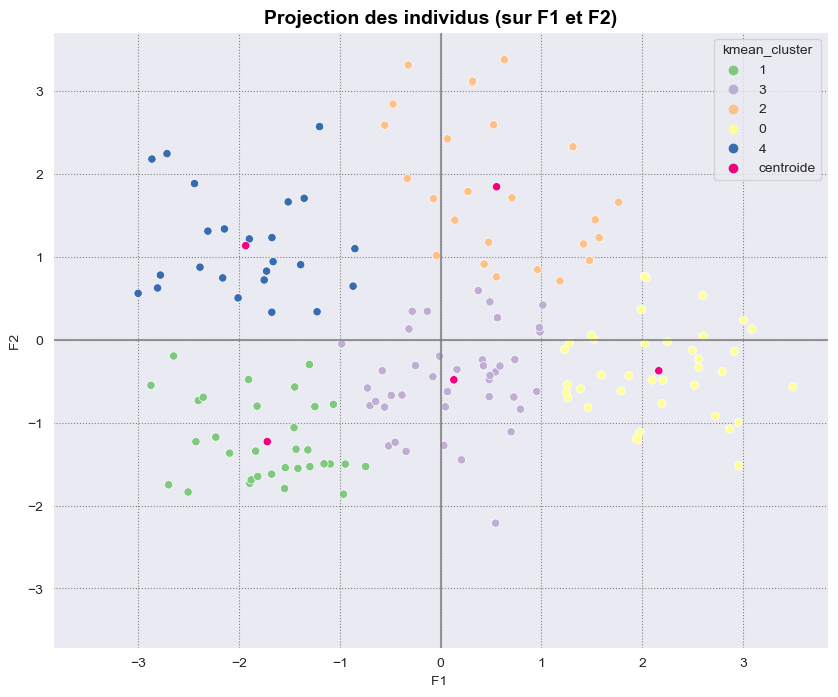

In [95]:
# Visualisation des individus avec clusters et centroides
x_y = [0,1] # Choix des composantes de l'ACP à représenter dans le plan
display_factorial_planes(df_acp_kmean_centroide,
                         x_y,
                         # labels = df_acp_kmean_centroide.index,
                         clusters = df_acp_kmean_centroide['kmean_cluster'])

In [86]:
# On sort avec df avec un clustering fait avec KMeans si on veux comparer les deux jusqu'à la fin
df_kmeans_cluster = df_final.copy()
df_kmeans_cluster['cluster'] = kmeans.labels_
df_kmeans_cluster = df_kmeans_cluster.drop(columns = ['F1', 'F2'], axis = 1)
df_kmeans_cluster

,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken,cluster
pays,,,,,,,,,,
Afghanistan,1.164779,36296.113,0.987451,1.889635e+04,0.002504,1997.0,54.09,0.491228,0.508772,2
Afrique du Sud,1.079063,57009.756,0.876736,3.808514e+05,0.047874,2987.0,83.36,0.787063,0.242682,1
Albanie,0.989730,2884.169,1.056815,1.301973e+04,0.025000,3400.0,119.50,0.276596,0.808511,3
Algérie,1.107140,41389.189,0.813631,1.700970e+05,0.006577,3345.0,92.85,0.992780,0.007220,1
Allemagne,1.020819,82658.409,1.046353,3.690849e+06,0.019949,3559.0,104.07,0.870615,0.484186,0
...,...,...,...,...,...,...,...,...,...,...
Égypte,1.115946,96442.591,0.705641,1.951353e+05,0.015083,3315.0,96.27,0.894400,0.088000,1
Émirats arabes unis,1.037806,9487.203,1.029405,3.856055e+05,0.043620,3370.0,107.26,0.116505,1.050971,3
Équateur,1.084739,16785.361,1.186197,1.042959e+05,0.032108,2585.0,65.77,0.997067,0.000000,1


---
## Partie 3 - Analyse des clusters

In [41]:
# Pour l'analyse des cluster on se base sur le clustering fait avec la CAH

In [42]:
df_cluster = df_final_cluster.copy()
df_cluster

,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken,F1,F2,cluster
pays,,,,,,,,,,,,
Afghanistan,1.164779,36296.113,0.987451,1.889635e+04,0.002504,1997.0,54.09,0.491228,0.508772,-2.875917,-0.550312,3
Afrique du Sud,1.079063,57009.756,0.876736,3.808514e+05,0.047874,2987.0,83.36,0.787063,0.242682,0.563941,0.265681,0
Albanie,0.989730,2884.169,1.056815,1.301973e+04,0.025000,3400.0,119.50,0.276596,0.808511,1.767279,1.658753,0
Algérie,1.107140,41389.189,0.813631,1.700970e+05,0.006577,3345.0,92.85,0.992780,0.007220,0.699225,-1.110325,1
Allemagne,1.020819,82658.409,1.046353,3.690849e+06,0.019949,3559.0,104.07,0.870615,0.484186,3.496864,-0.568130,2
...,...,...,...,...,...,...,...,...,...,...,...,...
Égypte,1.115946,96442.591,0.705641,1.951353e+05,0.015083,3315.0,96.27,0.894400,0.088000,0.726482,-0.691240,1
Émirats arabes unis,1.037806,9487.203,1.029405,3.856055e+05,0.043620,3370.0,107.26,0.116505,1.050971,1.313300,2.326672,0
Équateur,1.084739,16785.361,1.186197,1.042959e+05,0.032108,2585.0,65.77,0.997067,0.000000,-0.557080,-0.812938,1


In [43]:
# Principales caractéristiques à regarder par cluster :

    # Source d'approvisionnement en poulet du pays : Autosuffisance / Dépendance à l'import
    # Sa disponibilité alimentaire en kCal, protéine et le ratio que représente le poulet la dedans
    # L'évolution de son PIB et le PIB 2017
    # L'évolution de la population et la population de 2017
    
    # On recherche un cluster dont la dispo est faible, l'import élevé avec un PIB correct pour assurer le paiement
    
    # On procédera par élimination au fur et à mesure
    # Donc dans l'ordre : Dispo - PIB - TAS/TDI - Démographie
    

### *3.1. Groupes par disponibilité du alimentaire*

In [44]:
# On regarde les cluster selon la disponibilité en kCal et protéine afin de garder ceux qui en ont le moins

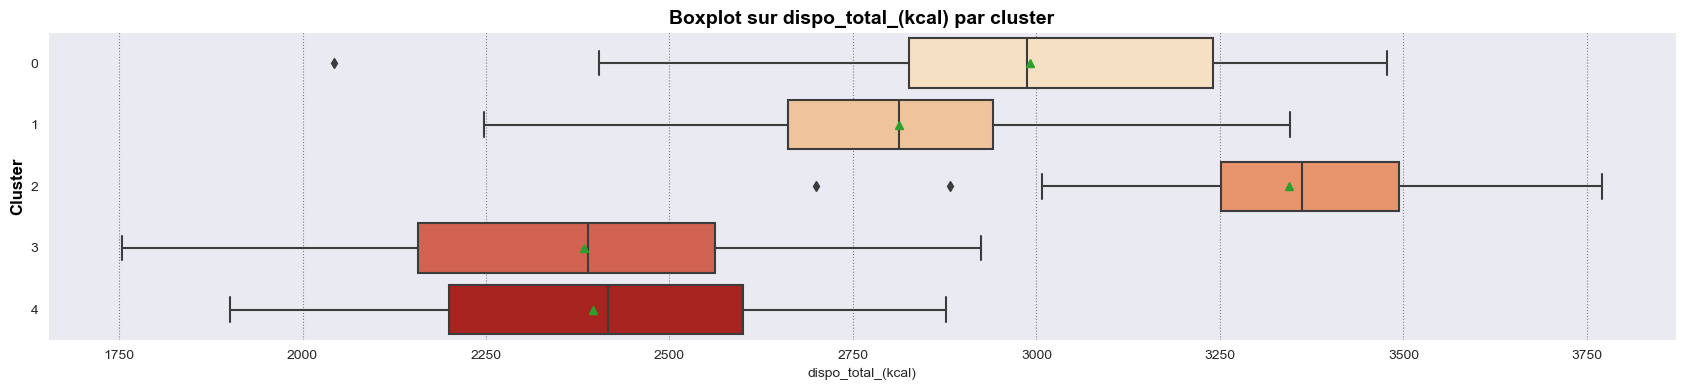

In [45]:
# Boxplot dispo_total_(kcal)
plt.figure(figsize = (21,4))

sns.boxplot(data = df_cluster, x = 'dispo_total_(kcal)', y = 'cluster', orient = 'h', showmeans = True, palette = 'OrRd')

plt.title('Boxplot sur dispo_total_(kcal) par cluster', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

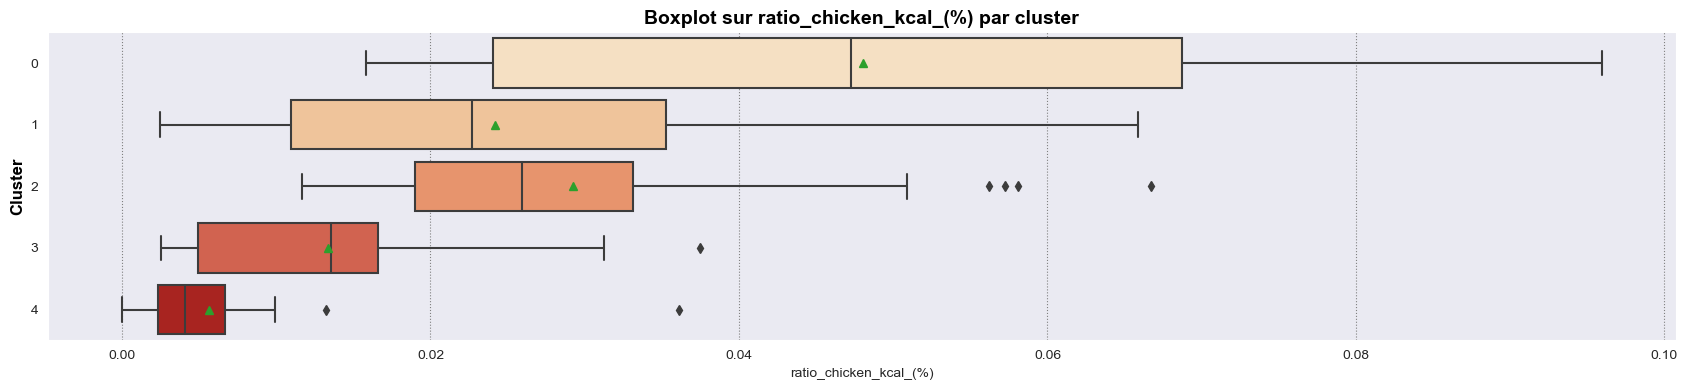

In [46]:
# Boxplot ratio_chicken_kcal_(%)
plt.figure(figsize = (21,4))

sns.boxplot(data = df_cluster, x = 'ratio_chicken_kcal_(%)', y = 'cluster', orient = 'h', showmeans = True, palette = 'OrRd')

plt.title('Boxplot sur ratio_chicken_kcal_(%) par cluster', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

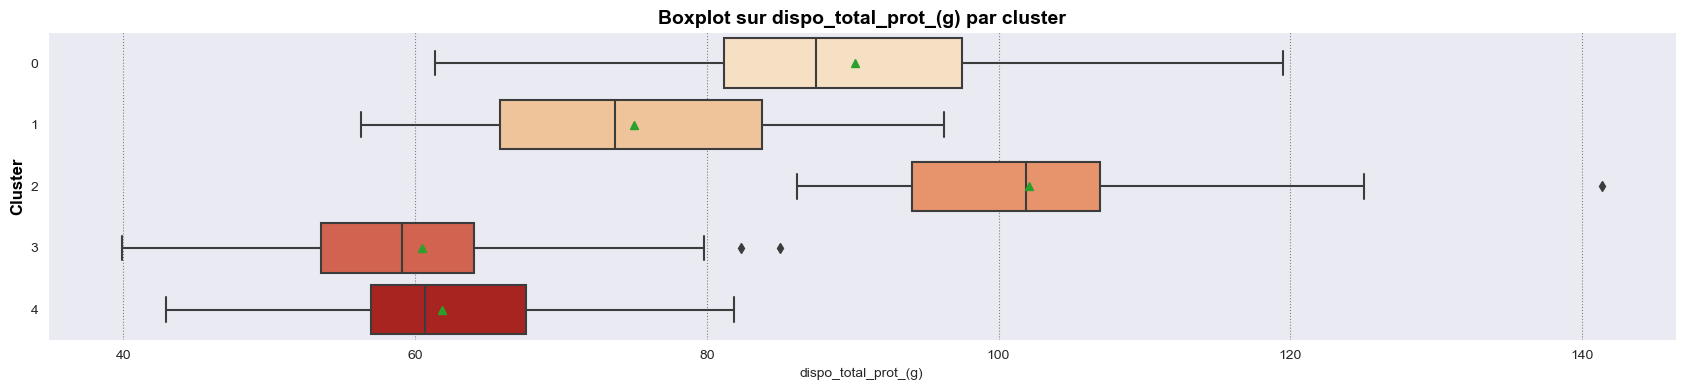

In [47]:
# Boxplot dispo_total_prot_(g)
plt.figure(figsize = (21,4))

sns.boxplot(data = df_cluster, x = 'dispo_total_prot_(g)', y = 'cluster', orient = 'h', showmeans = True, palette = 'OrRd')

plt.title('Boxplot sur dispo_total_prot_(g) par cluster', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [48]:
# Observations :

# Cluster 0 : + ratio kCal
# Cluster 1 : 
# Cluster 2 : + kCal Total, + prot Total
# Cluster 3 : - kCal Total, - prot Total
# Cluster 4 : - ratio kCal

# Conclusions : Le cluster 2 à le plus de disponibilité au total, donc pas vraiment intéressant

In [49]:
# On écarte le cluster 2
cluster_4 = df_cluster.loc[df_cluster['cluster'] !=2]
cluster_4

,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken,F1,F2,cluster
pays,,,,,,,,,,,,
Afghanistan,1.164779,36296.113,0.987451,18896.352020,0.002504,1997.0,54.09,0.491228,0.508772,-2.875917,-0.550312,3
Afrique du Sud,1.079063,57009.756,0.876736,380851.444100,0.047874,2987.0,83.36,0.787063,0.242682,0.563941,0.265681,0
Albanie,0.989730,2884.169,1.056815,13019.729860,0.025000,3400.0,119.50,0.276596,0.808511,1.767279,1.658753,0
Algérie,1.107140,41389.189,0.813631,170096.987200,0.006577,3345.0,92.85,0.992780,0.007220,0.699225,-1.110325,1
Angola,1.187544,29816.766,0.953698,122123.858600,0.015446,2266.0,54.09,0.131661,0.868339,-2.810028,0.624011,3
...,...,...,...,...,...,...,...,...,...,...,...,...
Égypte,1.115946,96442.591,0.705641,195135.299300,0.015083,3315.0,96.27,0.894400,0.088000,0.726482,-0.691240,1
Émirats arabes unis,1.037806,9487.203,1.029405,385605.506900,0.043620,3370.0,107.26,0.116505,1.050971,1.313300,2.326672,0
Équateur,1.084739,16785.361,1.186197,104295.862000,0.032108,2585.0,65.77,0.997067,0.000000,-0.557080,-0.812938,1


### *3.4. Groupes par PIB*

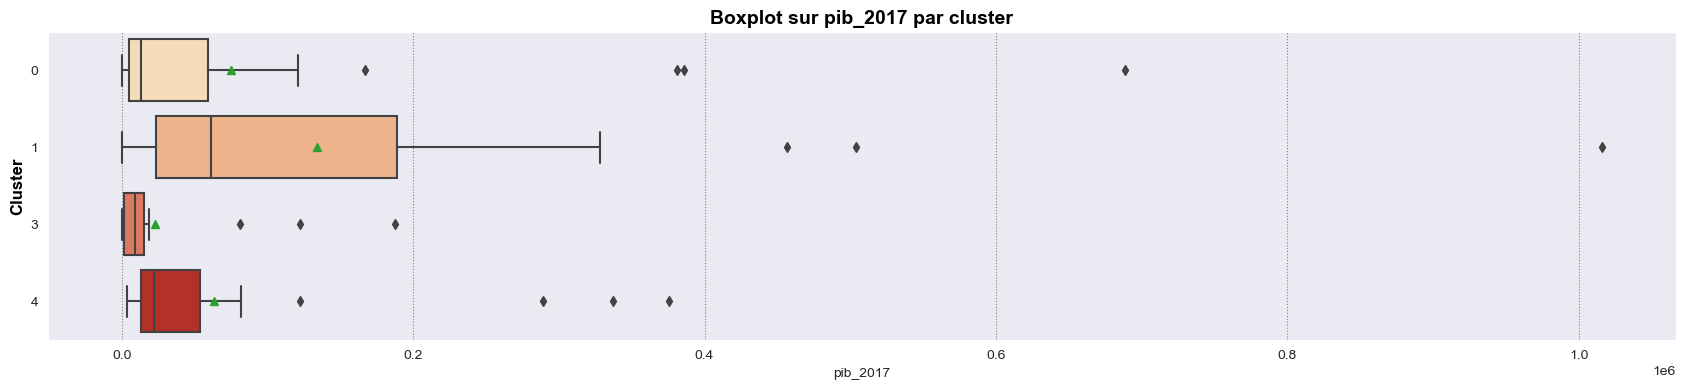

In [50]:
# Boxplot pib_2017
plt.figure(figsize = (21,4))

sns.boxplot(data = cluster_4, x = 'pib_2017', y = 'cluster', orient = 'h', showmeans = True, palette = 'OrRd')

plt.title('Boxplot sur pib_2017 par cluster', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

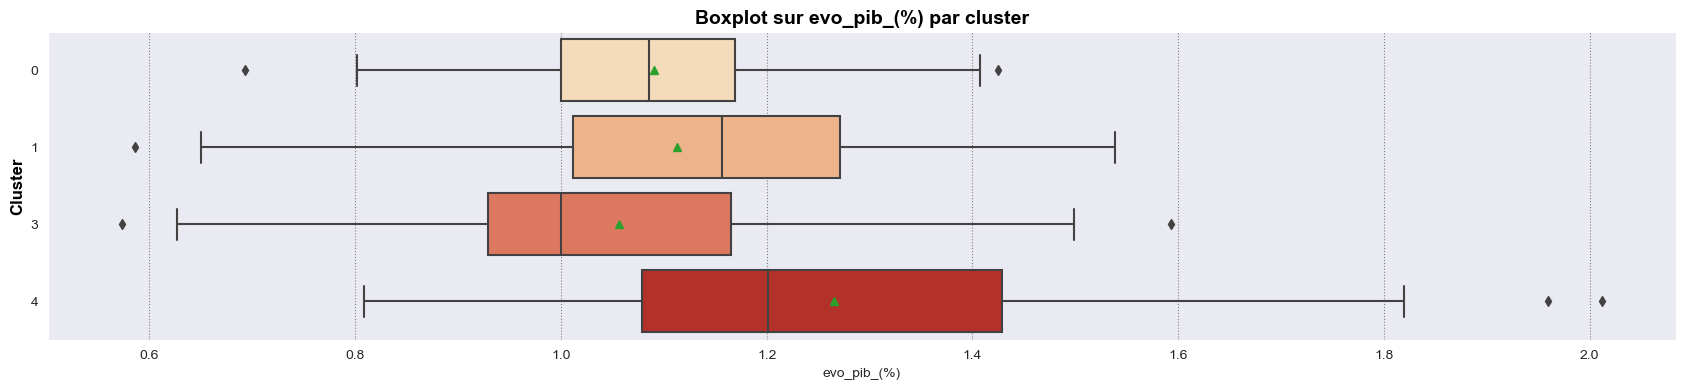

In [51]:
# Boxplot evo_pib_(%)
plt.figure(figsize = (21,4))

sns.boxplot(data = cluster_4, x = 'evo_pib_(%)', y = 'cluster', orient = 'h', showmeans = True, palette = 'OrRd')

plt.title('Boxplot sur evo_pib_(%) par cluster', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [52]:
# Observations :

# Cluster 0 : 
# Cluster 1 : + PIB
# Cluster 2 : OUT
# Cluster 3 : - PIB, - Evo PIB
# Cluster 4 : + Evo PIB

# Conclusions : On écarte le cluster 3 car il a le plus faible PIB et la plus faible évolution du PIB

In [53]:
# On écarte le cluster 
cluster_3 = cluster_4.loc[cluster_4['cluster'] != 3]
cluster_3

,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken,F1,F2,cluster
pays,,,,,,,,,,,,
Afrique du Sud,1.079063,57009.756,0.876736,380851.444100,0.047874,2987.0,83.36,0.787063,0.242682,0.563941,0.265681,0
Albanie,0.989730,2884.169,1.056815,13019.729860,0.025000,3400.0,119.50,0.276596,0.808511,1.767279,1.658753,0
Algérie,1.107140,41389.189,0.813631,170096.987200,0.006577,3345.0,92.85,0.992780,0.007220,0.699225,-1.110325,1
Antigua-et-Barbuda,1.055492,95.426,1.223368,1467.977778,0.095924,2429.0,81.15,0.000000,1.000000,-0.320239,3.312981,0
Arabie saoudite,1.135356,33101.179,0.935611,688586.094400,0.047276,3194.0,87.51,0.429268,0.503136,0.431410,0.912039,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,1.085508,14236.595,1.287809,22040.654700,0.007383,2167.0,51.20,0.907895,0.078947,-1.836058,-1.343627,4
Égypte,1.115946,96442.591,0.705641,195135.299300,0.015083,3315.0,96.27,0.894400,0.088000,0.726482,-0.691240,1
Émirats arabes unis,1.037806,9487.203,1.029405,385605.506900,0.043620,3370.0,107.26,0.116505,1.050971,1.313300,2.326672,0


### *3.2. Groupes par Autosuffisance et dépendance à l'import*

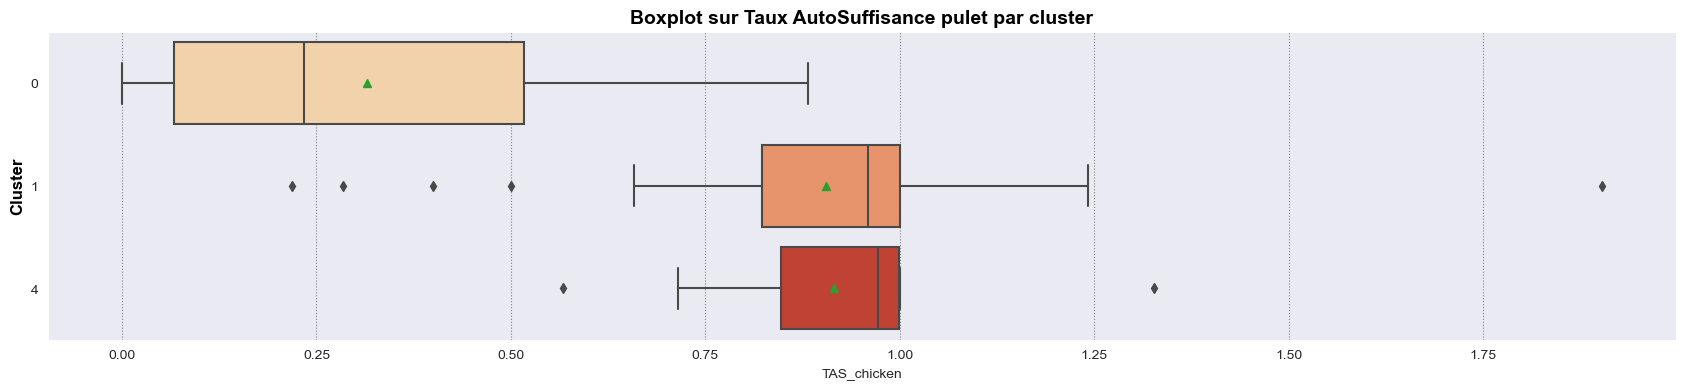

In [54]:
# Boxplot TAS
plt.figure(figsize = (21,4))

sns.boxplot(data = cluster_3, x = 'TAS_chicken', y = 'cluster', orient = 'h', showmeans = True, palette = 'OrRd')

plt.title('Boxplot sur Taux AutoSuffisance pulet par cluster', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

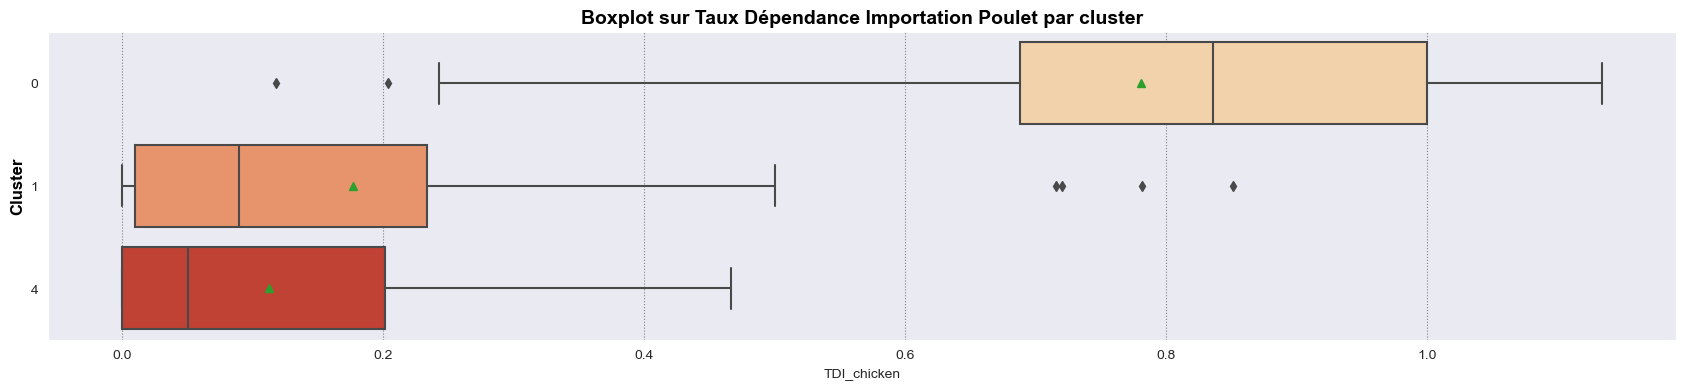

In [55]:
# Boxplot TDI
plt.figure(figsize = (21,4))

sns.boxplot(data = cluster_3, x = 'TDI_chicken', y = 'cluster', orient = 'h', showmeans = True, palette = 'OrRd')

plt.title('Boxplot sur Taux Dépendance Importation Poulet par cluster', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [56]:
# Observations :

# Cluster 0 : - TAS, + TDI
# Cluster 1 : 
# Cluster 2 : OUT
# Cluster 3 : OUT
# Cluster 4 : + TAS, -TDI

# Conclusions : Le cluster 4 n'est pas intéressant car il importe peu et est autosuffisant

In [57]:
# On écarte le cluster 4
cluster_2 = cluster_3.loc[cluster_3['cluster'] != 4]
cluster_2

,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken,F1,F2,cluster
pays,,,,,,,,,,,,
Afrique du Sud,1.079063,57009.756,0.876736,380851.444100,0.047874,2987.0,83.36,0.787063,0.242682,0.563941,0.265681,0
Albanie,0.989730,2884.169,1.056815,13019.729860,0.025000,3400.0,119.50,0.276596,0.808511,1.767279,1.658753,0
Algérie,1.107140,41389.189,0.813631,170096.987200,0.006577,3345.0,92.85,0.992780,0.007220,0.699225,-1.110325,1
Antigua-et-Barbuda,1.055492,95.426,1.223368,1467.977778,0.095924,2429.0,81.15,0.000000,1.000000,-0.320239,3.312981,0
Arabie saoudite,1.135356,33101.179,0.935611,688586.094400,0.047276,3194.0,87.51,0.429268,0.503136,0.431410,0.912039,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),1.001418,29402.484,0.650253,247932.199800,0.031598,2247.0,56.30,0.958466,0.039936,-0.645306,-0.743819,1
Viet Nam,1.053437,94600.648,1.436143,223779.866100,0.016338,2938.0,90.03,0.761194,0.241294,0.424972,-0.314124,1
Égypte,1.115946,96442.591,0.705641,195135.299300,0.015083,3315.0,96.27,0.894400,0.088000,0.726482,-0.691240,1


### *3.3 Groupes par évolution population*

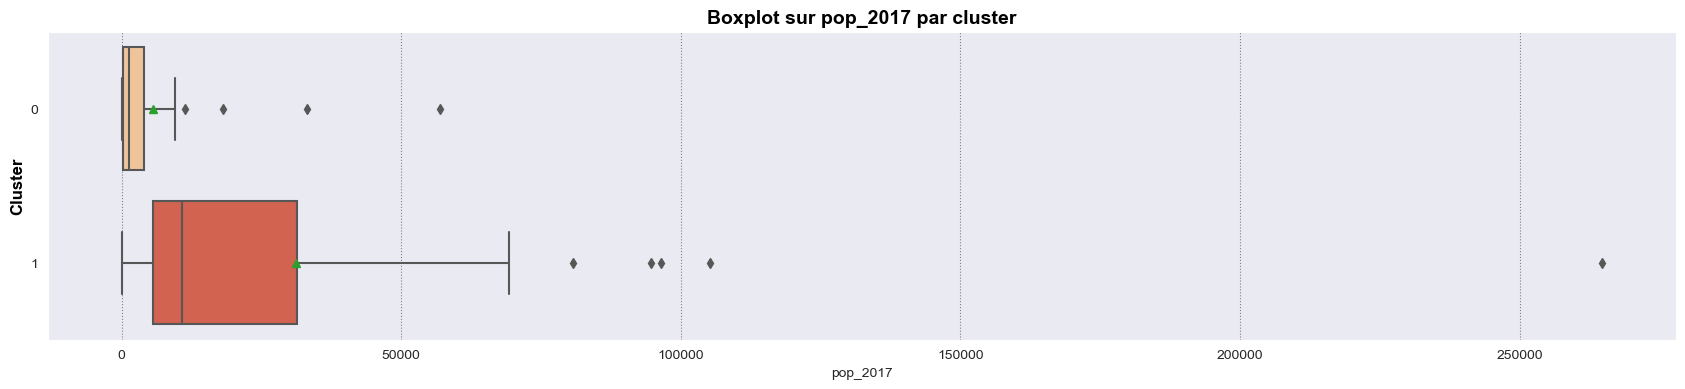

In [58]:
# Boxplot pop_2017
plt.figure(figsize = (21,4))

sns.boxplot(data = cluster_2, x = 'pop_2017', y = 'cluster', orient = 'h', showmeans = True, palette = 'OrRd')

plt.title('Boxplot sur pop_2017 par cluster', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

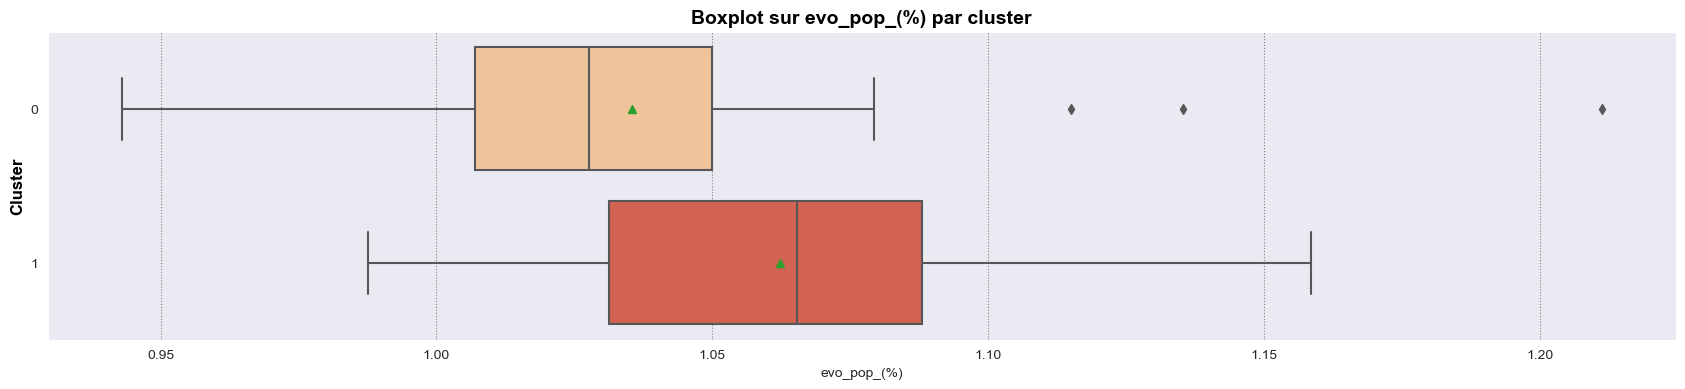

In [59]:
# Boxplot evo_pop_(%)
plt.figure(figsize = (21,4))

sns.boxplot(data = cluster_2, x = 'evo_pop_(%)', y = 'cluster', orient = 'h', showmeans = True, palette = 'OrRd')

plt.title('Boxplot sur evo_pop_(%) par cluster', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [60]:
# Observations :

# Cluster 0 : - POP, Evo POP
# Cluster 1 : + POP, + Evo POP
# Cluster 2 : OUT
# Cluster 3 : OUT
# Cluster 4 : OUT

# Conclusions : On garde le cluster 1 car sa population évolue plus donc le besoin évoluera aussi
# Notre cluster final sera donc le cluster 1

In [61]:
cluster_final_v1 = cluster_2.loc[cluster_2['cluster'] != 0]
cluster_final_v1.head()

,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken,F1,F2,cluster
pays,,,,,,,,,,,,
Algérie,1.107140,41389.189,0.813631,170096.987200,0.006577,3345.0,92.85,0.992780,0.007220,0.699225,-1.110325,1
Azerbaïdjan,1.062671,9845.320,0.586491,40866.632050,0.014184,3102.0,92.30,0.806202,0.209302,0.544259,-0.388598,1
Belize,1.111743,375.769,1.201230,2286.221544,0.040831,2694.0,67.11,1.052632,0.000000,-0.490035,-0.671954,1
Bolivie (État plurinational de),1.078551,11192.855,1.384876,37508.683070,0.065845,2354.0,68.40,1.242424,0.002331,-0.250070,-0.311189,1
Chypre,1.039322,1179.678,0.916070,22946.535930,0.034839,2612.0,80.20,0.657895,0.368421,-0.131845,0.342844,1


---
### 3.4. Infos complémentaires sur les clusters

In [62]:
# On regarde quand même certains détails des différents clusters pour information

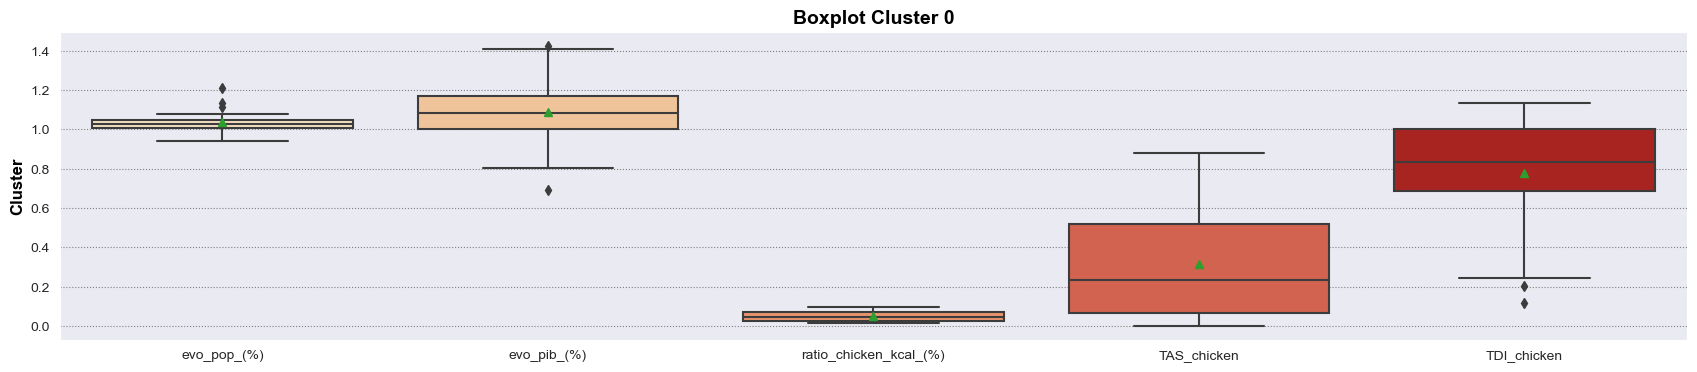

In [63]:
test_cluster = df_cluster.loc[df_cluster['cluster'] == 0]
test_cluster.head()
# Boxplot evo_pop_(%)
plt.figure(figsize = (21,4))

sns.boxplot(data = test_cluster.drop(columns   = ['pop_2017', 'pib_2017', 'F1', 'F2', 'cluster', 'dispo_total_(kcal)', 'dispo_total_prot_(g)'], axis = 1), showmeans = True, palette = 'OrRd')

plt.title('Boxplot Cluster 0', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

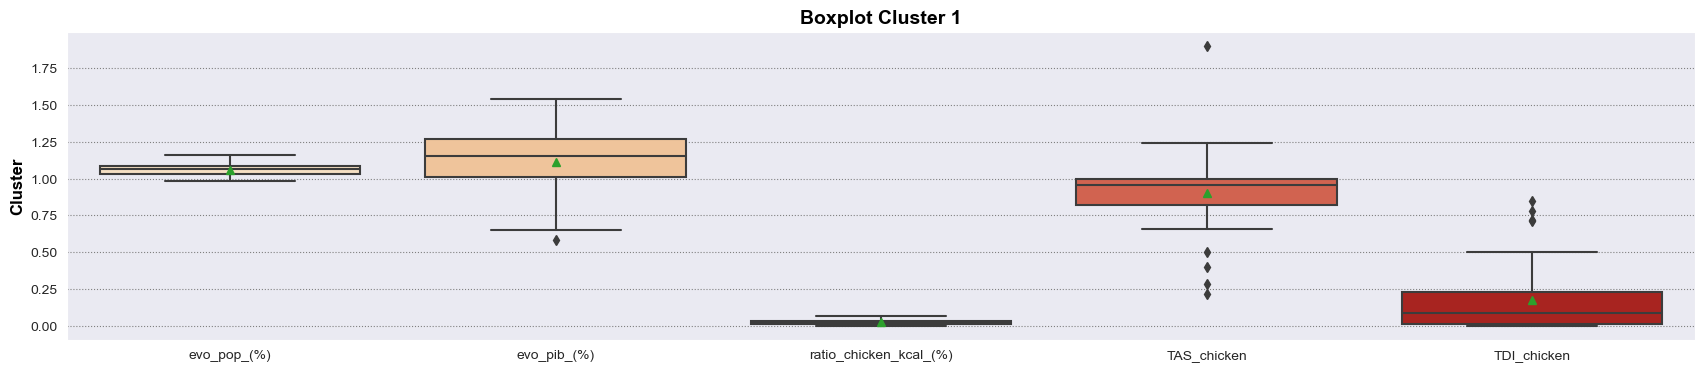

In [64]:
test_cluster = df_cluster.loc[df_cluster['cluster'] == 1]
test_cluster.head()
# Boxplot evo_pop_(%)
plt.figure(figsize = (21,4))

sns.boxplot(data = test_cluster.drop(columns   = ['pop_2017', 'pib_2017', 'F1', 'F2', 'cluster', 'dispo_total_(kcal)', 'dispo_total_prot_(g)'], axis = 1), showmeans = True, palette = 'OrRd')

plt.title('Boxplot Cluster 1', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

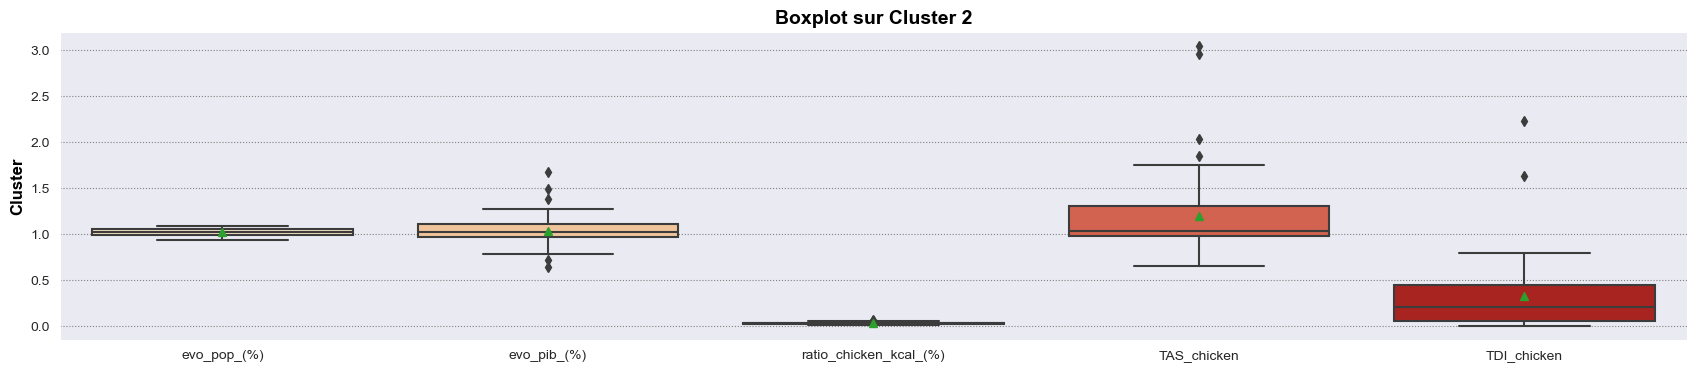

In [65]:
test_cluster = df_cluster.loc[df_cluster['cluster'] == 2]
test_cluster.head()
# Boxplot evo_pop_(%)
plt.figure(figsize = (21,4))

sns.boxplot(data = test_cluster.drop(columns   = ['pop_2017', 'pib_2017', 'F1', 'F2', 'cluster', 'dispo_total_(kcal)', 'dispo_total_prot_(g)'], axis = 1), showmeans = True, palette = 'OrRd')

plt.title('Boxplot sur Cluster 2', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

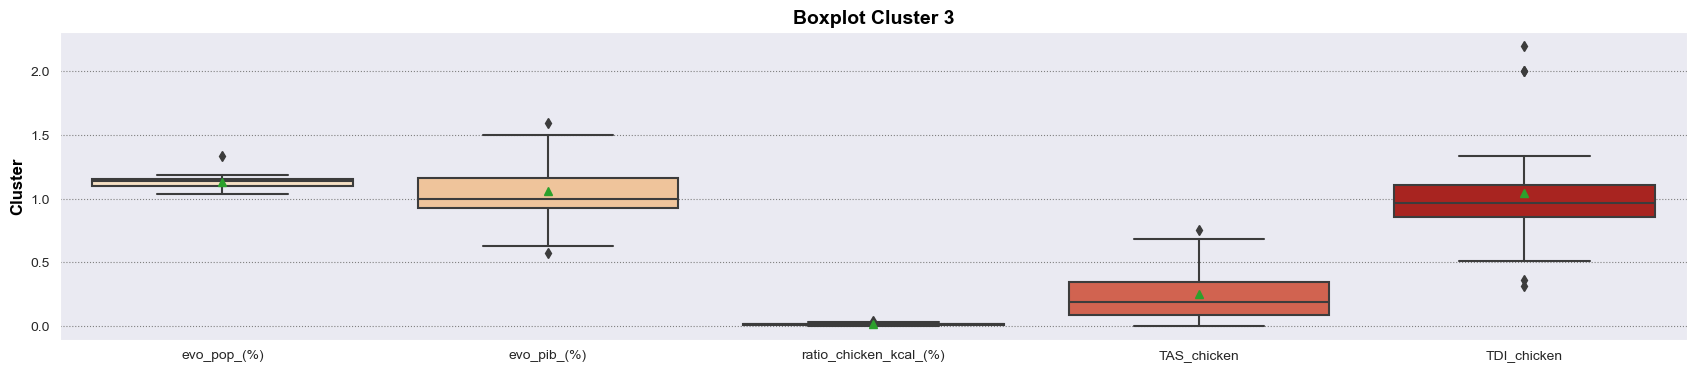

In [66]:
test_cluster = df_cluster.loc[df_cluster['cluster'] == 3]
test_cluster.head()
# Boxplot evo_pop_(%)
plt.figure(figsize = (21,4))

sns.boxplot(data = test_cluster.drop(columns   = ['pop_2017', 'pib_2017', 'F1', 'F2', 'cluster', 'dispo_total_(kcal)', 'dispo_total_prot_(g)'], axis = 1), showmeans = True, palette = 'OrRd')

plt.title('Boxplot Cluster 3', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

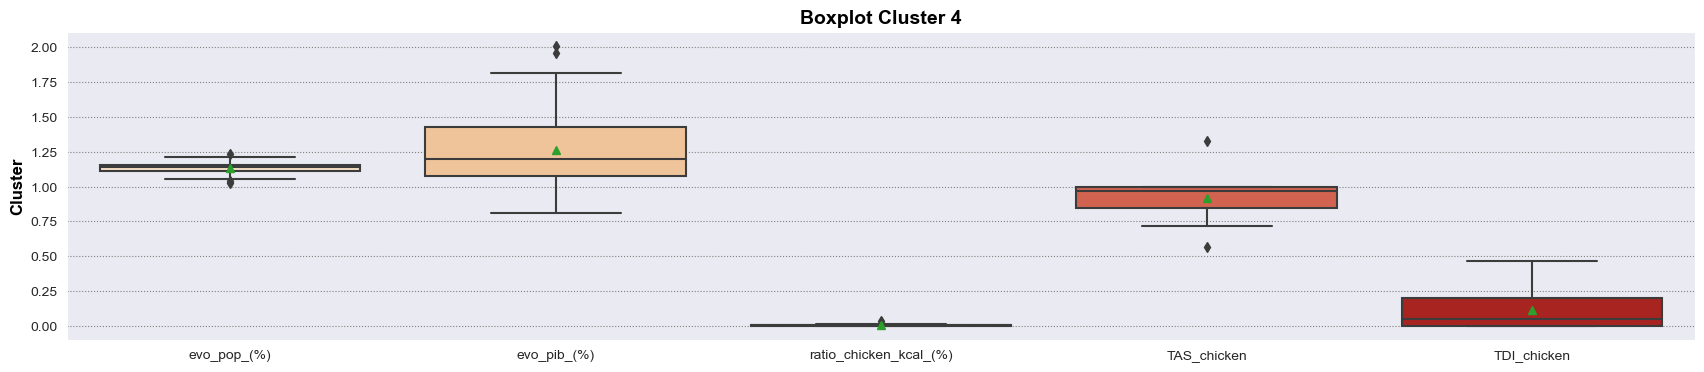

In [67]:
test_cluster = df_cluster.loc[df_cluster['cluster'] == 4]
test_cluster.head()
# Boxplot evo_pop_(%)
plt.figure(figsize = (21,4))

sns.boxplot(data = test_cluster.drop(columns   = ['pop_2017', 'pib_2017', 'F1', 'F2', 'cluster', 'dispo_total_(kcal)', 'dispo_total_prot_(g)'], axis = 1), showmeans = True, palette = 'OrRd')

plt.title('Boxplot Cluster 4', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

---
## Partie 5 - Cluster final

In [68]:
# Liste des pays du  cluster recommandé : Cluster 1
print(cluster_final_v1.index.tolist())

['Algérie', 'Azerbaïdjan', 'Belize', 'Bolivie (État plurinational de)', 'Chypre', 'Colombie', 'Costa Rica', 'El Salvador', 'Fidji', 'Ghana', 'Guatemala', 'Honduras', 'Indonésie', "Iran (République islamique d')", 'Kirghizistan', 'Kiribati', 'Malaisie', 'Mali', 'Myanmar', 'Nicaragua', 'Népal', 'Panama', 'Paraguay', 'Philippines', 'Pérou', 'République de Moldova', 'République dominicaine', 'Serbie', 'Slovaquie', 'Sri Lanka', 'Suriname', 'Thaïlande', 'Turkménistan', 'Uruguay', 'Venezuela (République bolivarienne du)', 'Viet Nam', 'Égypte', 'Équateur']


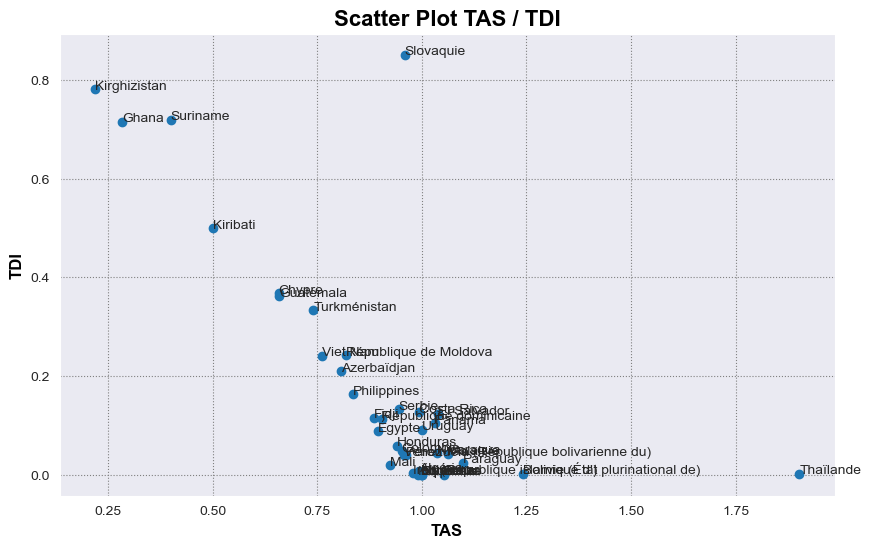

In [69]:
# On fait un scatterplot du TAS et TDI du dernier cluster restant afin de cibler quelques pays dans ce cluster
# On regardera l'autosuffisance et la dépendance à l'importation principalement
X = cluster_final_v1['TAS_chicken']
Y = cluster_final_v1['TDI_chicken']

# Récupération des noms de pays
annotations=cluster_final_v1.index.tolist()

# Tracé du graph
plt.figure(figsize = (10, 6))
plt.scatter(X,Y)
plt.xlabel('TAS', fontsize = 12, fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('TDI', fontsize = 12, fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.title('Scatter Plot TAS / TDI', fontsize = 16, fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})

# Ajout des labels
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

plt.show()

In [70]:
cluster_final_v1.describe()

,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken,F1,F2,cluster
count,38.000000,38.000000,38.000000,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,1.062187,31131.436816,1.112715,1.341143e+05,0.024190,2813.210526,74.991053,0.905780,0.176632,-0.052455,-0.518700,1.0
std,0.038820,48593.163757,0.235404,1.952466e+05,0.015193,245.091616,11.136659,0.274977,0.238813,0.577457,0.620690,0.0
min,0.987642,114.158000,0.586491,1.881820e+02,0.002444,2247.000000,56.300000,0.218750,0.000000,-1.226564,-2.212431,1.0
25%,1.031323,5525.341750,1.011800,2.359698e+04,0.010981,2661.500000,65.827500,0.822709,0.010223,-0.510013,-0.805471,1.0
50%,1.065432,10852.979500,1.157051,6.135938e+04,0.022676,2812.500000,73.730000,0.958963,0.089455,-0.043522,-0.531874,1.0
75%,1.088046,31359.385000,1.271690,1.888757e+05,0.035261,2940.250000,83.802500,1.000000,0.233296,0.482524,-0.259669,1.0
max,1.158512,264650.963000,1.538539,1.015619e+06,0.065845,3345.000000,96.270000,1.902384,0.851351,0.952907,1.098228,1.0


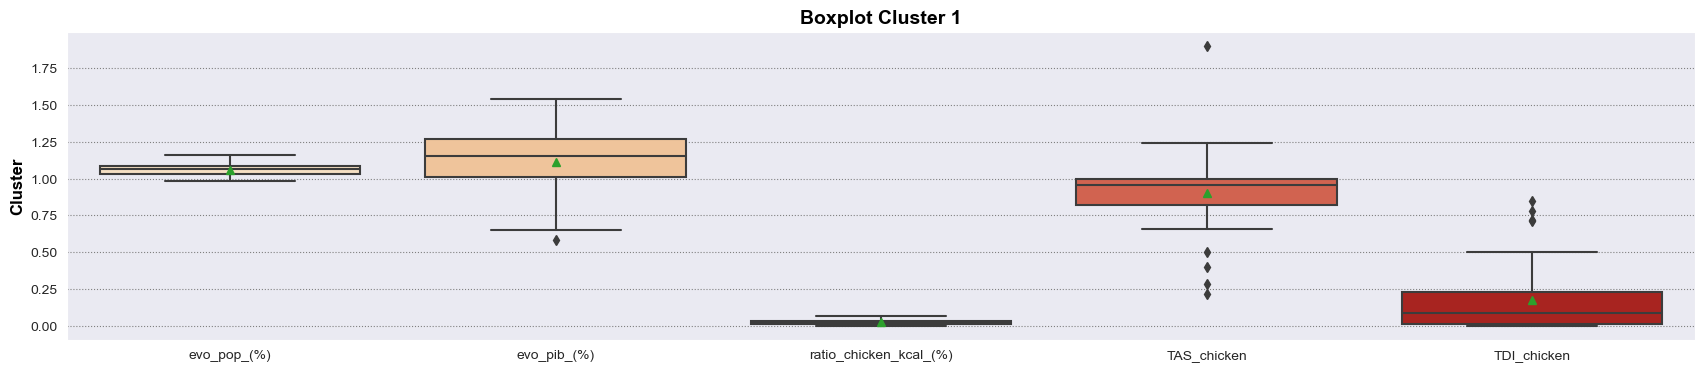

In [71]:
plt.figure(figsize = (21,4))

sns.boxplot(data = cluster_final_v1.drop(columns   = ['pop_2017', 'pib_2017', 'F1', 'F2', 'cluster', 'dispo_total_(kcal)', 'dispo_total_prot_(g)'], axis = 1), showmeans = True, palette = 'OrRd')

plt.title('Boxplot Cluster 1', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Cluster', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [72]:
# Quelques infos sur ce cluster

# Le poulet représente peu par rapport à la disponibilité totale de kCal dans le pays
# Les TAS est en dessous de 1 et le TDI avoisine les 20%
# On note une évolution de la population de l'ordre de 6% en 5 ans et du PIB de 11%

# FIN

In [73]:
# Merci de votre attention
# D. GESSER ;)